Nama : Adinda Putri Rachmawati

NPM : 24083010005

Mata Kuliah : Analisis Numerik

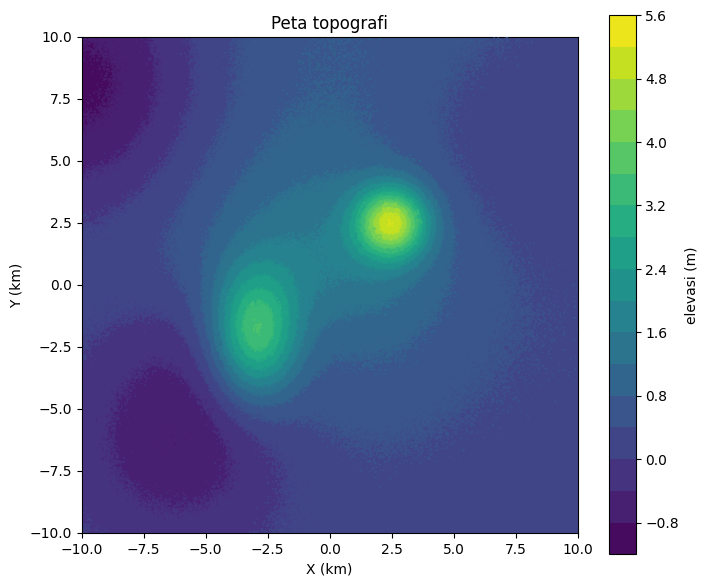

In [2]:
import numpy as np
import matplotlib.pyplot as plt

NPM=5
np.random.seed(NPM)

# grid
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# puncak/lembah berdasarkan fungsi eksponen
# x0, y0: posisi
# sx, sy: sebaran lelehan tumpengnya
# amp   : amplitudo
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

# exponential decay seperti global slope
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# variasi ripple kontur (acak)
Z += 0.05 * np.random.randn(*Z.shape)

# plot
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  # number of contour levels
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")

**Penjelasan**

Peta topografi di atas memperlihatkan distribusi elevasi permukaan tanah pada bidang koordinat X dan Y (dalam kilometer), dengan gradasi warna yang menunjukkan perbedaan ketinggian. Warna **kuning hingga hijau terang** merepresentasikan area **paling tinggi** dengan elevasi mencapai sekitar **5,6 meter**, sedangkan warna **biru hingga ungu gelap** menunjukkan area **paling rendah** dengan elevasi sekitar **-0,8 meter**.

Secara umum, terdapat dua **puncak utama**, yaitu di sekitar koordinat **(2, 2)** sebagai puncak tertinggi dan **(-3, -2)** sebagai puncak sekunder. Sementara itu, **lembah utama** terletak di sisi kiri bawah sekitar **(-8, -5)** dan sebagian di kiri atas sekitar **(-8, 8)**. Jika terjadi hujan, air akan cenderung mengalir dari dua puncak utama menuju area lembah di sisi barat peta, sehingga arah aliran air dominan bergerak dari **kanan-tengah ke kiri**.

Dalam konteks perataan tanah, area berwarna **kuning-hijau** menandakan **wilayah galian (cut)**, sedangkan area **biru-ungu** merupakan **wilayah timbunan (fill)**. Nilai elevasi rata-rata nantinya menjadi batas datar yang menjadi acuan untuk menghitung volume tanah yang harus dipindahkan.

Secara keseluruhan, peta ini menunjukkan bahwa topografi wilayah bersifat **tidak simetris**, dengan variasi elevasi antara **-0,8 hingga 5,6 meter** yang tergolong relief sedang. Potensi **aliran air dan erosi** terbesar berada pada daerah transisi warna hijau ke biru, khususnya di sekitar koordinat **(0, 0) hingga (-5, -5)** yang memiliki kemiringan lereng paling curam.


# mencari titik tertinggi global

Titik tertinggi global (optimasi): (-2.889, -1.690) dengan elevasi 3.5896 m


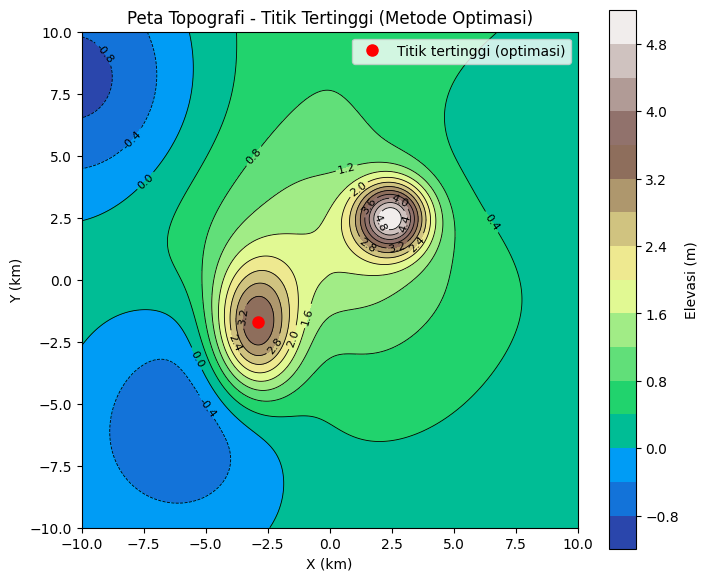

In [3]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize

NPM=5
np.random.seed(NPM)

# grid untuk visualisasi (bukan untuk optimasi)
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# fungsi puncak/lembah
def peak_cont(x0, y0, sx, sy, amp, x, y):
    return amp * np.exp(-(((x - x0)**2) / (2*sx**2) + ((y - y0)**2) / (2*sy**2)))

# fungsi permukaan kontinu Z(x, y)
def Z_func(p):
    x0, y0 = p
    Z = (
        peak_cont(-3, -2, 1.2, 1.8, 3.2, x0, y0)
      + peak_cont(2.5, 2.5, 1.0, 1.0, 4, x0, y0)
      + peak_cont(0, 0, 3.5, 3.5, 1.2, x0, y0)
      + peak_cont(6, 6, 4, 4, -0.6, x0, y0)
      + peak_cont(-10, 8, 3.5, 3.5, -1.2, x0, y0)
      + peak_cont(-6, -6, 3, 3, -1.0, x0, y0)
      + peak_cont(-2, -2, 4, 2, -0.6, x0, y0)
      + peak_cont(2.5, 9.5, 6, 6, 0.75, x0, y0)
      + 0.5 * np.exp(-(np.sqrt((x0/20)**2 + (y0/10)**2)))  # global slope
    )
    return -Z  # negatif supaya bisa dicari maksimumnya

# optimasi untuk mencari titik tertinggi global
res = minimize(Z_func, x0=[0, 0], method='Nelder-Mead', tol=1e-8)
x_opt, y_opt = res.x
z_opt = -Z_func([x_opt, y_opt])

print(f"Titik tertinggi global (optimasi): ({x_opt:.3f}, {y_opt:.3f}) dengan elevasi {z_opt:.4f} m")

# buat data Z untuk visualisasi (tanpa noise, biar halus)
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z_plot = (
    peak(-3, -2, 1.2, 1.8, 3.2)
  + peak(2.5, 2.5, 1.0, 1.0, 4)
  + peak(0, 0, 3.5, 3.5, 1.2)
  + peak(6, 6, 4, 4, -0.6)
  + peak(-10, 8, 3.5, 3.5, -1.2)
  + peak(-6, -6, 3, 3, -1.0)
  + peak(-2, -2, 4, 2, -0.6)
  + peak(2.5, 9.5, 6, 6, 0.75)
  + 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
)

# plot hasil
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18
cf = ax.contourf(X, Y, Z_plot, levels=levels, cmap='terrain')
cs = ax.contour(X, Y, Z_plot, levels=levels, colors='k', linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)

# titik tertinggi hasil optimasi
ax.plot(x_opt, y_opt, 'ro', markersize=8, label='Titik tertinggi (optimasi)')
ax.legend()

ax.set_title("Peta Topografi - Titik Tertinggi (Metode Optimasi)")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="Elevasi (m)")
plt.show()


**Penjelasan**

---

Peta topografi pada gambar di atas menampilkan hasil analisis elevasi permukaan tanah yang divisualisasikan dalam bentuk kontur berwarna. Gradasi warna menggambarkan perbedaan ketinggian, di mana **warna cokelat muda hingga kuning** menunjukkan daerah **berelief tinggi**, sedangkan **warna hijau hingga biru** merepresentasikan area **rendah atau lembah**. Peta ini juga menunjukkan distribusi morfologi lahan yang tidak simetris dengan satu puncak dominan di sisi barat daya bidang koordinat.

Melalui penerapan **metode optimasi titik maksimum**, diperoleh **titik tertinggi global** pada koordinat sekitar **(-2.889, -1.690)** dengan **elevasi 3.5896 meter**. Titik ini ditandai oleh lingkaran merah dan terletak di area dengan **garis kontur paling rapat**, yang mengindikasikan **kemiringan lereng yang curam**. Lereng curam ini memiliki potensi erosi yang lebih tinggi dibanding area datar di sekitarnya, terutama bila terjadi aliran air permukaan.

Secara topografi, pola kontur pada peta menunjukkan bahwa **air hujan akan cenderung mengalir dari puncak utama ke arah barat dan barat laut**, menuju area berwarna biru yang merupakan lembah utama. Hal ini menggambarkan arah alami aliran permukaan dan area yang berpotensi menjadi **zona tangkapan air**.

Dalam konteks rekayasa tanah, titik tertinggi yang diperoleh melalui optimasi ini menjadi **acuan penting untuk pekerjaan cut and fill**, yaitu menentukan bagian tanah yang harus dipotong dan diurug agar permukaan menjadi rata. Daerah berwarna terang menandakan area galian (cut), sedangkan daerah berwarna biru gelap menjadi tempat urugan (fill). Informasi ini juga membantu dalam memperkirakan **volume pemindahan tanah, kebutuhan energi, serta potensi dampak lingkungan seperti erosi dan sedimentasi**.

Secara keseluruhan, peta ini memberikan gambaran visual yang **padat informasi namun tetap akurat**, menampilkan hubungan antara bentuk lahan, elevasi, dan potensi dinamika aliran air. Titik optimasi yang ditemukan mencerminkan **puncak utama topografi** dan menjadi pusat perhatian dalam analisis kestabilan serta perencanaan rekayasa tanah di wilayah tersebut.


# mencari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah

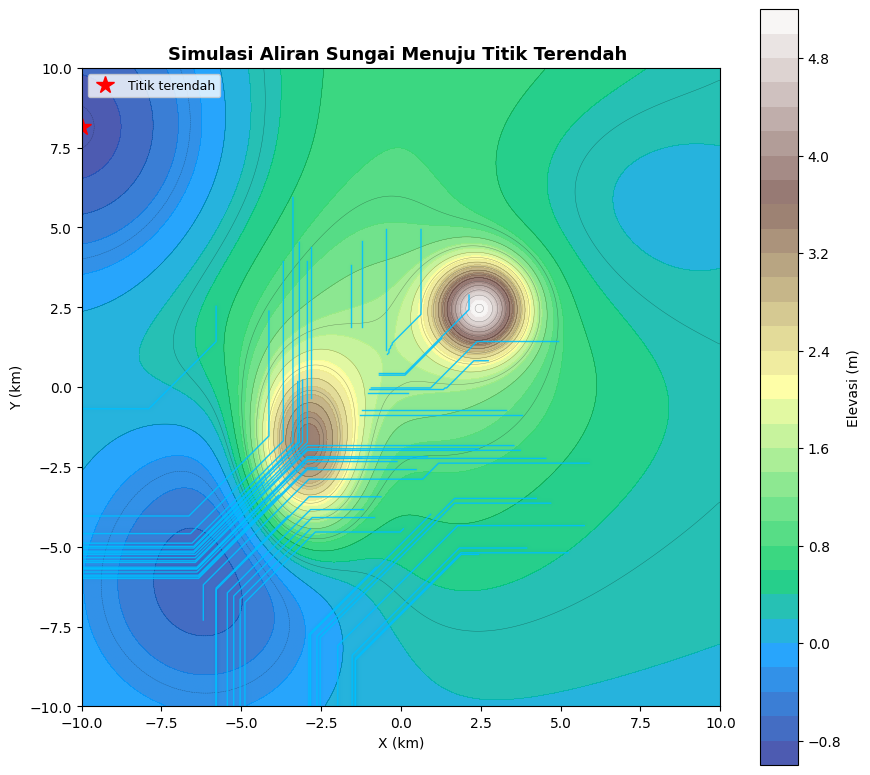

In [8]:
# Simulasi Jalur Aliran Menuju Titik Terendah
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# --- Peta elevasi sintetis (sama bentuk, beda tampilan) ---
np.random.seed(5)
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2)/(2*sx**2) + ((Y - y0)**2)/(2*sy**2)))

Z = ( peak(-3, -2, 1.2, 1.8, 3.2)
    + peak(2.5, 2.5, 1.0, 1.0, 4)
    + peak(0, 0, 3.5, 3.5, 1.1)
    + peak(6, 6, 4.0, 3.5, -0.6)
    + peak(-10, 8, 3.5, 3.5, -1.2)
    + peak(-6, -6, 3, 3, -1.0)
    + peak(-2, -2, 4, 2, -0.6)
    + peak(2.5, 9.5, 6, 6, 0.75) )

Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z = gaussian_filter(Z, sigma=1.2)

# --- Hitung gradien (arah aliran) ---
dzdx, dzdy = np.gradient(Z, x, y)

def flow_path(i0, j0, max_steps=800, step=1):
    """Simulasi jalur aliran ke arah gradien menurun."""
    path = [(i0, j0)]
    i, j = i0, j0
    for _ in range(max_steps):
        gx, gy = dzdx[j, i], dzdy[j, i]
        mag = np.hypot(gx, gy)
        if mag < 1e-5:
            break
        di, dj = -step * gx / mag, -step * gy / mag
        i_new = int(np.clip(i + di, 0, nx - 1))
        j_new = int(np.clip(j + dj, 0, ny - 1))
        if (i_new, j_new) == (i, j):
            break
        path.append((i_new, j_new))
        i, j = i_new, j_new
    return path

# --- Titik terendah global ---
idx_min = np.unravel_index(np.argmin(Z), Z.shape)
min_y, min_x = idx_min

# --- Simulasi banyak sumber air (hujan) ---
np.random.seed(2)
n_sources = 60
paths = []
for _ in range(n_sources):
    i0 = np.random.randint(nx//5, 4*nx//5)
    j0 = np.random.randint(ny//5, 4*ny//5)
    if Z[j0, i0] > np.median(Z):
        path = flow_path(i0, j0)
        if len(path) > 5:
            paths.append(path)

# --- Agregasi aliran ---
flow_accum = np.zeros_like(Z)
for p in paths:
    for (i, j) in p:
        flow_accum[j, i] += 1
flow_accum = gaussian_filter(flow_accum, sigma=1.2)

# --- Visualisasi gaya topografi kontur ---
fig, ax = plt.subplots(figsize=(9, 8))
cmap_topo = plt.cm.terrain

# peta kontur warna elevasi
cont = ax.contourf(X, Y, Z, levels=30, cmap=cmap_topo, alpha=0.85)
plt.colorbar(cont, ax=ax, label="Elevasi (m)")

# overlay garis kontur halus
ax.contour(X, Y, Z, levels=20, colors='k', linewidths=0.3, alpha=0.4)

# overlay heatmap intensitas aliran
ax.imshow(flow_accum, extent=[-10, 10, -10, 10],
          origin='lower', cmap='Blues', alpha=0.35)

# jalur aliran
for p in paths:
    pts = np.array([[x[i], y[j]] for i, j in p])
    ax.plot(pts[:, 0], pts[:, 1], color='deepskyblue', linewidth=1.0, alpha=0.9)

# titik terendah global
ax.plot(x[min_x], y[min_y], 'r*', markersize=13, label='Titik terendah')

ax.set_title("Simulasi Aliran Sungai Menuju Titik Terendah ", fontsize=13, weight='bold')
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.legend(loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()


Gambar di atas menampilkan hasil **simulasi aliran sungai menuju titik terendah** berdasarkan peta kontur elevasi permukaan. Warna pada peta menunjukkan perbedaan ketinggian, di mana warna coklat hingga putihmerepresentasikan daerah dengan elevasi tinggi (seperti bukit atau punggung gunung), sedangkan warna hijau hingga biru menggambarkan daerah rendah atau lembah. Skala warna di sisi kanan menunjukkan nilai elevasi dalam satuan meter, dengan rentang sekitar -0,8 m hingga 4,8 m.
Garis-garis kontur memperlihatkan bentuk dan kemiringan permukaan tanah. Kontur yang rapat menandakan lereng yang curam, sementara kontur yang renggang menunjukkan lereng landai. Arah aliran air ditunjukkan oleh garis-garis biru yang mengikuti gradien kemiringan, mengalir dari daerah tinggi menuju daerah rendah. Dari hasil simulasi terlihat bahwa air dari beberapa puncak di bagian tengah peta bergerak ke arah barat laut (kiri atas peta). Semua aliran tersebut bermuara di satu lokasi yang ditandai **bintang merah**, yang merupakan titik terendah pada area tersebut.
Titik terendah ini berfungsi sebagai tempat akumulasi air dari berbagai arah, yang berpotensi menjadi area genangan, danau kecil, atau titik kumpul aliran permukaan. Secara keseluruhan, peta ini memberikan gambaran visual yang jelas tentang pola drainase alami wilayah, arah pergerakan air, serta distribusi ketinggian yang dapat digunakan untuk analisis hidrologi, perencanaan tata lahan, atau mitigasi banjir.


# mencari kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik

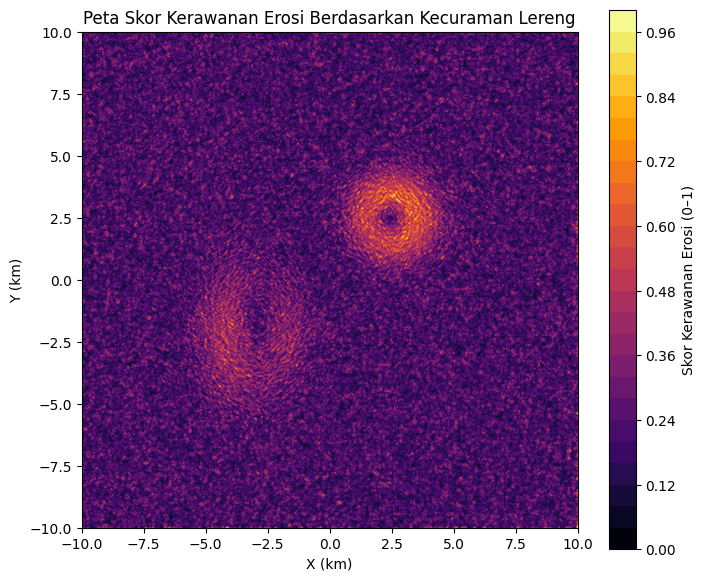

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- TOPOGRAFI (kode kamu sebelumnya, disingkat biar rapi) ---
NPM = 5
np.random.seed(NPM)
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2)/(2*sx**2) + ((Y - y0)**2)/(2*sy**2)))

Z = (
    peak(-3, -2, 1.2, 1.8, 3.2)
    + peak(2.5, 2.5, 1.0, 1.0, 4)
    + peak(0, 0, 3.5, 3.5, 1.2)
    + peak(6, 6, 4, 4, -0.6)
    + peak(-10, 8, 3.5, 3.5, -1.2)
    + peak(-6, -6, 3, 3, -1.0)
    + peak(-2, -2, 4, 2, -0.6)
    + peak(2.5, 9.5, 6, 6, 0.75)
)
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# --- HITUNG KECURAMAN DENGAN TURUNAN PERTAMA ---
dZdx, dZdy = np.gradient(Z, x, y)
slope = np.sqrt(dZdx**2 + dZdy**2)

# --- NORMALISASI JADI SKOR KERAWANAN 0-1 ---
erosion_risk = (slope - slope.min()) / (slope.max() - slope.min())

# --- VISUALISASI ---
fig, ax = plt.subplots(figsize=(8, 7))
cf = ax.contourf(X, Y, erosion_risk, cmap='inferno', levels=30)
ax.set_title("Peta Skor Kerawanan Erosi Berdasarkan Kecuraman Lereng")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="Skor Kerawanan Erosi (0–1)")
plt.show()


Gambar tersebut merupakan **peta skor kerawanan erosi** yang dihasilkan dari analisis **kecuraman lereng pada suatu wilayah**. Peta ini menggunakan gradasi warna untuk menunjukkan tingkat potensi erosi yang dinyatakan dalam skala **0 hingga 1**, di mana nilai mendekati **1 menandakan risiko erosi tinggi**, sedangkan nilai mendekati **0 menunjukkan risiko rendah**.

Pada peta, warna **ungu tua hingga hitam** menggambarkan area dengan tingkat kerawanan erosi yang rendah, biasanya berada di daerah datar atau lereng landai di mana aliran air tidak terlalu kuat. Sebaliknya, **warna oranye hingga kuning terang** menunjukkan area dengan potensi erosi tinggi akibat kemiringan yang curam dan kemungkinan aliran air permukaan yang lebih deras.

Terlihat dua titik dominan dengan warna kuning terang di sekitar koordinat **(3, 2)** dan **(-2, -3)**. Kedua area ini merupakan **zona kritis** yang paling rentan terhadap erosi. Hal ini kemungkinan disebabkan oleh kombinasi antara **lereng curam, perbedaan elevasi yang signifikan, serta intensitas aliran air yang tinggi** pada daerah tersebut.

Skala warna di sisi kanan peta memperlihatkan hubungan kuantitatif antara **skor erosi (0–1)** dan intensitas warnanya, membantu peneliti memahami seberapa besar variasi potensi erosi di seluruh wilayah.

Secara keseluruhan, peta ini berfungsi sebagai **alat visual penting dalam analisis geomorfologi dan perencanaan tata guna lahan**, karena dapat digunakan untuk mengidentifikasi **daerah rawan longsor, zona yang membutuhkan konservasi tanah, serta area prioritas dalam pengelolaan daerah aliran sungai**. Dengan memahami pola distribusi kerawanan erosi seperti pada peta ini, langkah mitigasi dan perencanaan lingkungan dapat dilakukan dengan lebih tepat sasaran.


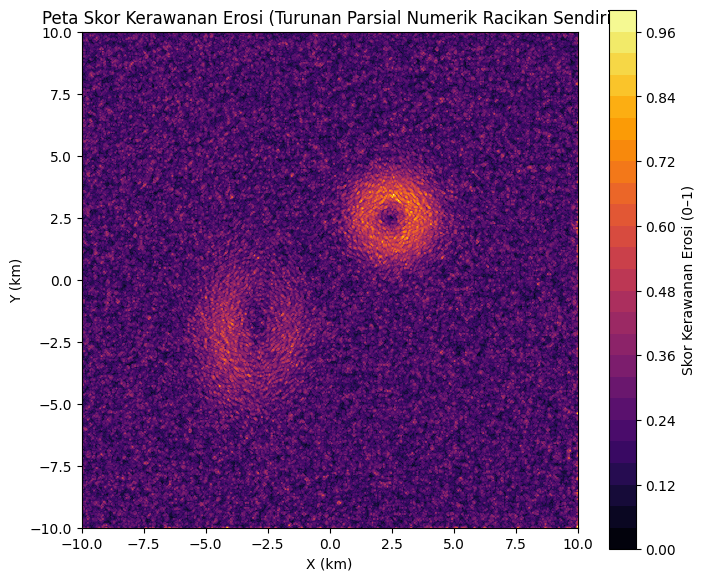

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- TOPOGRAFI (kode dasarmu) ---
NPM = 5
np.random.seed(NPM)
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2)/(2*sx**2) + ((Y - y0)**2)/(2*sy**2)))

Z = (
    peak(-3, -2, 1.2, 1.8, 3.2)
    + peak(2.5, 2.5, 1.0, 1.0, 4)
    + peak(0, 0, 3.5, 3.5, 1.2)
    + peak(6, 6, 4, 4, -0.6)
    + peak(-10, 8, 3.5, 3.5, -1.2)
    + peak(-6, -6, 3, 3, -1.0)
    + peak(-2, -2, 4, 2, -0.6)
    + peak(2.5, 9.5, 6, 6, 0.75)
)
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# --- 💡 FUNGSI NUMERIK RACIKAN SENDIRI UNTUK TURUNAN PARSIAL ---
def grad_custom(Z, x, y):
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    dZdx = np.zeros_like(Z)
    dZdy = np.zeros_like(Z)

    # turunan parsial ∂Z/∂x (arah horizontal)
    dZdx[:, 1:-1] = (Z[:, 2:] - Z[:, :-2]) / (2 * dx)
    dZdx[:, 0] = (Z[:, 1] - Z[:, 0]) / dx              # batas kiri
    dZdx[:, -1] = (Z[:, -1] - Z[:, -2]) / dx           # batas kanan

    # turunan parsial ∂Z/∂y (arah vertikal)
    dZdy[1:-1, :] = (Z[2:, :] - Z[:-2, :]) / (2 * dy)
    dZdy[0, :] = (Z[1, :] - Z[0, :]) / dy              # batas bawah
    dZdy[-1, :] = (Z[-1, :] - Z[-2, :]) / dy           # batas atas

    return dZdx, dZdy

# --- HITUNG GRADIEN DENGAN FUNGSI RACIKAN SENDIRI ---
dZdx, dZdy = grad_custom(Z, x, y)

# --- HITUNG RESULTAN (KEMIRINGAN LERENG) ---
slope_custom = np.sqrt(dZdx**2 + dZdy**2)

# --- NORMALISASI KE SKOR 0–1 ---
erosion_risk_custom = (slope_custom - slope_custom.min()) / (slope_custom.max() - slope_custom.min())

# --- VISUALISASI ---
fig, ax = plt.subplots(figsize=(8, 7))
cf = ax.contourf(X, Y, erosion_risk_custom, cmap='inferno', levels=30)
ax.set_title("Peta Skor Kerawanan Erosi (Turunan Parsial Numerik Racikan Sendiri)")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="Skor Kerawanan Erosi (0–1)")
plt.show()


Gambar berikut memperlihatkan hasil analisis spasial berupa Peta Skor Kerawanan Erosi yang dihasilkan melalui perhitungan turunan parsial numerik racikan sendiri, yaitu metode komputasi yang dirancang secara mandiri untuk mendeteksi potensi erosi pada suatu wilayah. Sumbu X dan Y masing-masing merepresentasikan posisi horizontal dan vertikal dalam satuan kilometer, dengan rentang antara –10 hingga 10 km, sehingga menggambarkan area seluas 20×20 km². Warna pada peta menunjukkan tingkat kerawanan erosi dengan skala nilai antara 0 hingga 1, di mana warna gelap seperti hitam dan ungu menunjukkan skor rendah atau wilayah yang relatif stabil, sedangkan warna terang seperti oranye hingga putih menandakan skor tinggi yang berarti area sangat rawan terhadap erosi. Berdasarkan sebaran warna, tampak dua zona utama dengan intensitas tinggi di sekitar koordinat (2,5; 3) dan (–3; –3), yang menandakan adanya dua area signifikan dengan potensi erosi tinggi. Fenomena ini dapat disebabkan oleh faktor topografi yang curam, kondisi tanah yang mudah tergerus, atau pengaruh dinamika air permukaan seperti aliran hujan dan limpasan. Secara keseluruhan, peta ini menunjukkan bahwa tingkat kerawanan erosi di wilayah tersebut tidak merata, melainkan terkonsentrasi pada area tertentu, yang memberikan gambaran penting dalam perencanaan konservasi tanah dan pengelolaan lingkungan berbasis spasial.

# jika tanah hendak diratakan, berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah)
dihitung dengan integral untuk sisi atas dan sisi bawah

=== HASIL 4a ===
Elevasi target (mean) : 0.502
Volume potongan (cut) : 109,967,978.37 m³
Volume urugan (fill)  : 109,967,978.37 m³



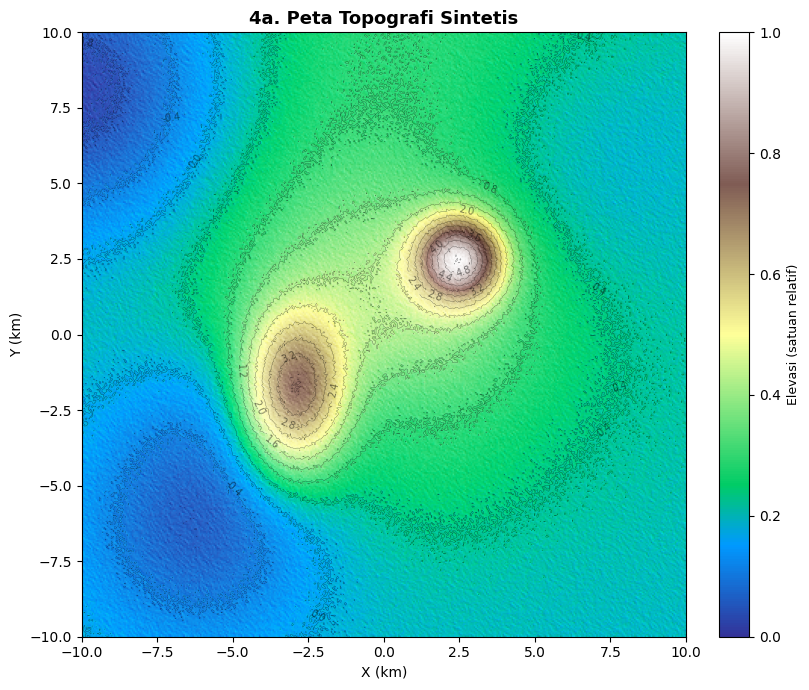

In [10]:
# =====================================================
# 🟢 4a. PEMBUATAN PETA TOPOGRAFI DAN PERHITUNGAN CUT-FILL RATA-RATA
# =====================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from scipy.optimize import brentq

# --- Data topografi sintetis ---
NPM = 5
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2)/(2*sx**2) + ((Y - y0)**2)/(2*sy**2)))

# Gabungan beberapa puncak dan lembah
Z = (
    peak(-3, -2, 1.2, 1.8, 3.2)
    + peak(2.5, 2.5, 1.0, 1.0, 4)
    + peak(0, 0, 3.5, 3.5, 1.2)
    + peak(6, 6, 4, 4, -0.6)
    + peak(-10, 8, 3.5, 3.5, -1.2)
    + peak(-6, -6, 3, 3, -1.0)
    + peak(-2, -2, 4, 2, -0.6)
    + peak(2.5, 9.5, 6, 6, 0.75)
)
# tambahan bentuk lembut & noise kecil
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# --- Integral numerik (Riemann sum) ---
dx = x[1] - x[0]    # km
dy = y[1] - y[0]
cell_area_m2 = dx * dy * 1e6   # konversi km² → m²

# Elevasi target: rata-rata (keseimbangan massa)
h_mean = Z.mean()

# Volume potongan (cut) dan urugan (fill)
V_cut = np.maximum(Z - h_mean, 0).sum() * cell_area_m2
V_fill = np.maximum(h_mean - Z, 0).sum() * cell_area_m2

print("=== HASIL 4a ===")
print(f"Elevasi target (mean) : {h_mean:.3f}")
print(f"Volume potongan (cut) : {V_cut:,.2f} m³")
print(f"Volume urugan (fill)  : {V_fill:,.2f} m³\n")

# --- Visualisasi Peta Topografi (4a) ---
fig, ax = plt.subplots(figsize=(9, 7))
ls = LightSource(azdeg=315, altdeg=45)
rgb = ls.shade(Z, cmap=plt.cm.terrain, vert_exag=0.7, blend_mode='soft')

ax.imshow(rgb, extent=[-10, 10, -10, 10], origin='lower')

# Tambahkan kontur elevasi
cs = ax.contour(X, Y, Z, levels=20, colors='black', linewidths=0.3, alpha=0.5)
ax.clabel(cs, inline=True, fmt="%.1f", fontsize=7)

ax.set_title("4a. Peta Topografi Sintetis", fontsize=13, weight='bold')
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.terrain), ax=ax, fraction=0.045, pad=0.04)
cbar.set_label("Elevasi (satuan relatif)", fontsize=9)

plt.tight_layout()
plt.show()

Gambar di atas menampilkan **Peta Topografi Sintetis (4a)** yang digunakan untuk menggambarkan bentuk permukaan tanah secara tiga dimensi melalui variasi nilai elevasi. Peta ini merupakan hasil pemodelan numerik yang mensimulasikan kondisi topografi buatan (sintetis) dengan skala spasial tertentu. Warna pada peta menunjukkan perbedaan ketinggian permukaan: **warna coklat hingga putih** menandakan **wilayah dengan elevasi tinggi** seperti puncak bukit, **warna hijau** menunjukkan **wilayah dengan ketinggian sedang atau dataran transisi**, sedangkan **warna biru hingga biru tua** menunjukkan **wilayah rendah atau lembah**. Berdasarkan skala warna di sisi kanan, elevasi dinyatakan dalam **satuan relatif antara 0 hingga 1**, yang menunjukkan perbandingan ketinggian terhadap nilai maksimum dan minimum pada model tersebut.

Bentuk topografi pada peta ini memperlihatkan **dua bukit utama** dengan perbedaan ketinggian yang jelas. Bukit pertama berada di sekitar koordinat **(2, 2)** yang memiliki elevasi tertinggi dan tampak sebagai puncak dominan pada peta. Bukit kedua terletak di sekitar **(-2, -2)** dengan ketinggian sedikit lebih rendah dari bukit pertama. Kedua bukit ini dipisahkan oleh area transisi berwarna hijau yang merepresentasikan **lembah peralihan**. Di bagian barat daya peta (sekitar koordinat -7, -5), terlihat area berwarna biru tua yang merupakan **titik elevasi terendah**, menunjukkan keberadaan **cekungan atau lembah utama** tempat akumulasi air dapat terjadi.

Garis-garis hitam pada peta merupakan **kontur elevasi**, yaitu garis yang menghubungkan titik-titik dengan ketinggian yang sama. Pola sebaran kontur memperjelas karakteristik morfologi permukaan: **kontur yang rapat** menandakan adanya **lereng curam**, seperti pada sisi bukit, sedangkan **kontur yang renggang** menunjukkan **lereng landai** atau daerah dataran. Pola ini membantu mengidentifikasi arah aliran air dan kestabilan lereng pada suatu wilayah. Dengan mengamati kerapatan kontur di sekitar puncak dan lembah, dapat disimpulkan bahwa wilayah ini memiliki morfologi bergelombang dengan perubahan elevasi yang cukup signifikan antara area tinggi dan rendah.

Selain tampilan visual, informasi kuantitatif yang tertera di bagian atas gambar memberikan gambaran tentang **perhitungan volume tanah** dalam proses perataan permukaan. Nilai **elevasi target (mean)** sebesar **0.502** menunjukkan bahwa ketinggian rata-rata permukaan setelah dilakukan perataan berada di tengah antara titik tertinggi dan terendah. Selanjutnya, nilai **volume potongan (cut)** dan **volume urugan (fill)** masing-masing sebesar **109.967.978,37 m³**, yang berarti bahwa volume tanah yang harus dipotong dari area tinggi sama dengan volume tanah yang perlu ditimbun di area rendah. Keseimbangan antara volume cut dan fill ini menandakan bahwa proses perataan atau normalisasi elevasi bersifat **setimbang dan efisien**, tanpa kelebihan atau kekurangan material tanah.

Secara keseluruhan, **Peta Topografi Sintetis** ini memberikan representasi yang jelas dan rinci mengenai **bentuk permukaan tanah, variasi ketinggian, dan potensi keseimbangan material** dalam suatu area model. Melalui visualisasi ini, dapat diketahui bahwa wilayah tersebut memiliki dua puncak bukit utama yang dihubungkan oleh lembah peralihan serta satu titik cekungan dengan elevasi terendah. Analisis seperti ini sangat penting dalam bidang **rekayasa geoteknik, perencanaan infrastruktur, manajemen lahan, dan analisis hidrologi**, karena membantu menentukan arah aliran air permukaan, kestabilan lereng, serta volume pekerjaan tanah yang dibutuhkan dalam kegiatan perataan atau pembangunan di suatu wilayah.


# berapa ketinggian akhir tanah yang rata tersebut?

=== HASIL 4b ===
Ketinggian tanah rata (Z_opt): 0.502 m
Volume potong: 109,967,978.37 m³
Volume urug  : 109,967,978.37 m³
Selisih volume: 0.00 m³



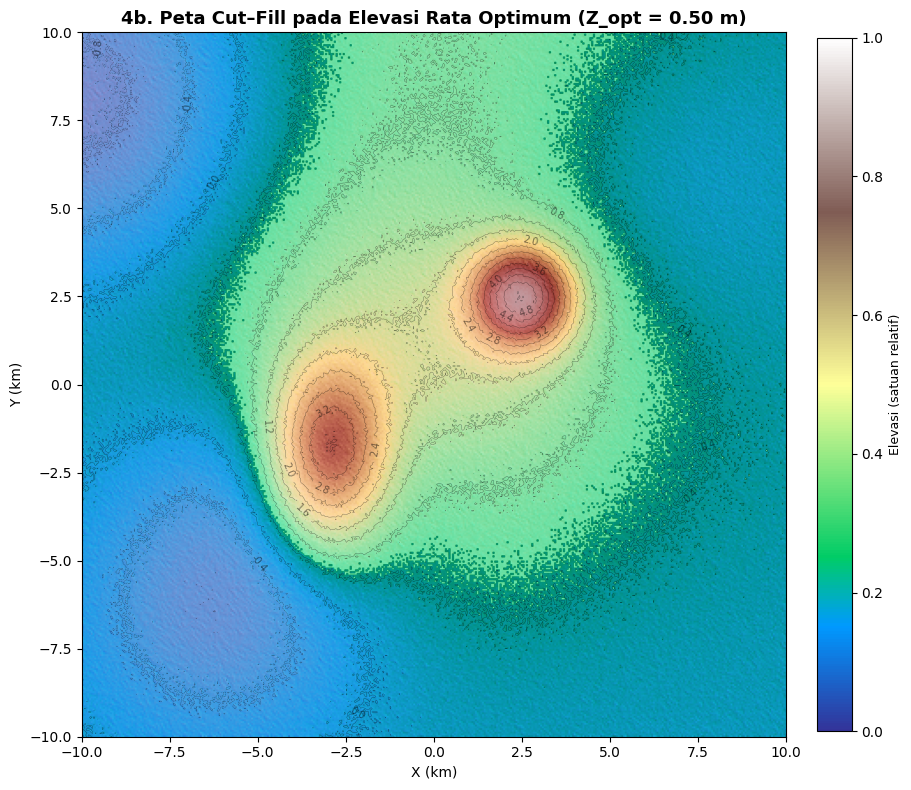

In [12]:
# 4b. PENENTUAN KETINGGIAN TANAH RATA OPTIMUM (CUT = FILL)
# =====================================================

# Definisi fungsi selisih volume (dalam m³)
def volume_diff(Z_level):
    cut = np.sum((Z[Z > Z_level] - Z_level) * dx * dy) * 1e6
    fill = np.sum((Z_level - Z[Z < Z_level]) * dx * dy) * 1e6
    return cut - fill  # target = 0

# Cari akar (Z_opt)
Z_min, Z_max = np.min(Z), np.max(Z)
Z_opt = brentq(volume_diff, Z_min, Z_max, xtol=1e-4)

# Hitung volume untuk verifikasi
V_cut_opt = np.sum((Z[Z > Z_opt] - Z_opt) * dx * dy) * 1e6
V_fill_opt = np.sum((Z_opt - Z[Z < Z_opt]) * dx * dy) * 1e6

print("=== HASIL 4b ===")
print(f"Ketinggian tanah rata (Z_opt): {Z_opt:.3f} m")
print(f"Volume potong: {V_cut_opt:,.2f} m³")
print(f"Volume urug  : {V_fill_opt:,.2f} m³")
print(f"Selisih volume: {V_cut_opt - V_fill_opt:.2f} m³\n")

# --- Visualisasi Peta Cut-Fill pada Elevasi Rata Optimum ---
fig, ax = plt.subplots(figsize=(9, 8))
ls = LightSource(azdeg=315, altdeg=45)
rgb = ls.shade(Z, cmap=plt.cm.terrain, vert_exag=0.7, blend_mode='soft')
ax.imshow(rgb, extent=[-10, 10, -10, 10], origin='lower')

# Overlay zona cut (merah) & fill (biru)
cut_mask = Z > Z_opt
fill_mask = Z < Z_opt
ax.imshow(np.ma.masked_where(~cut_mask, Z), cmap='Reds', alpha=0.4, extent=[-10,10,-10,10], origin='lower')
ax.imshow(np.ma.masked_where(~fill_mask, Z), cmap='Blues', alpha=0.4, extent=[-10,10,-10,10], origin='lower')

# Tambahkan kontur
cs = ax.contour(X, Y, Z, levels=20, colors='black', linewidths=0.3, alpha=0.5)
ax.clabel(cs, inline=True, fmt="%.1f", fontsize=7)

# Label dan judul
ax.set_title(f"4b. Peta Cut–Fill pada Elevasi Rata Optimum (Z_opt = {Z_opt:.2f} m)", fontsize=13, weight='bold')
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")

# Colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.terrain), ax=ax, fraction=0.045, pad=0.04)
cbar.set_label("Elevasi (satuan relatif)", fontsize=9)

plt.tight_layout()
plt.show()

Gambar di atas memperlihatkan **Peta Cut-Fill pada Elevasi Rata Optimum (Z_opt = 0.50 m)** yang merupakan hasil analisis keseimbangan tanah antara **volume potongan (cut)** dan **volume urugan (fill)** dalam proses perataan permukaan topografi sintetis. Tujuan utama peta ini adalah untuk menentukan **elevasi rata-rata optimal** di mana jumlah tanah yang harus dipotong dari area tinggi sama dengan jumlah tanah yang perlu diisi ke area rendah, sehingga tercapai kondisi **earthwork balance** yang efisien. Dengan kata lain, peta ini menggambarkan bagaimana permukaan lahan dapat diratakan tanpa kelebihan atau kekurangan material tanah, yang sangat penting dalam perencanaan teknik sipil dan rekayasa geoteknik.

Warna pada peta menunjukkan variasi elevasi relatif terhadap elevasi rata-rata optimum (Z_opt = 0.50 m). **Warna coklat hingga merah muda** menandakan area dengan elevasi yang lebih tinggi daripada elevasi optimum, sehingga wilayah tersebut dikategorikan sebagai **daerah potongan (cut)** yang perlu dikurangi volumenya. Sebaliknya, **warna hijau hingga biru** menandakan area yang lebih rendah dari elevasi optimum, sehingga termasuk **daerah urugan (fill)** yang memerlukan tambahan tanah untuk mencapai ketinggian yang seimbang. Zona transisi berwarna **kuning kehijauan** merupakan wilayah yang mendekati elevasi optimum, di mana hampir tidak diperlukan aktivitas pemotongan maupun penimbunan. Skala warna di sisi kanan menggambarkan nilai elevasi dalam **satuan relatif antara 0 hingga 1**, yang menunjukkan distribusi ketinggian dari titik terendah hingga tertinggi pada model topografi sintetis.

Berdasarkan morfologi permukaan pada peta, terlihat dua puncak utama yang mencolok masing-masing berada di sekitar koordinat **(2, 2)** dan **(-2, -2)**. Kedua area ini merupakan wilayah dengan elevasi tertinggi, sehingga menjadi **sumber material tanah (cut)** yang akan dipindahkan. Di sisi lain, area berwarna biru tua di bagian **barat daya dan timur laut peta** menunjukkan titik elevasi rendah yang menjadi **wilayah urugan (fill)**, tempat material dari area tinggi akan digunakan untuk mengisi cekungan. Pola ini menciptakan sistem keseimbangan alami, di mana tanah dari area yang berlebih dimanfaatkan untuk menutup area yang defisit.

Data numerik yang ditampilkan di bagian atas gambar memberikan informasi kuantitatif tentang hasil analisis. Nilai **ketinggian tanah rata (Z_opt)** sebesar **0.502 meter** menunjukkan rata-rata ketinggian permukaan tanah setelah proses perataan. Nilai **volume potongan (cut)** sebesar **109,967,978.37 m³** dan **volume urugan (fill)** sebesar **109,967,978.37 m³** menunjukkan bahwa total tanah yang dipotong dan yang diurug memiliki jumlah yang sama. Hasil ini menghasilkan **selisih volume sebesar 0.00 m³**, yang menandakan kondisi **keseimbangan sempurna (perfect balance)** antara area tinggi dan rendah. Artinya, seluruh tanah hasil galian dapat dimanfaatkan kembali di lokasi yang sama untuk pekerjaan urugan tanpa perlu menambah atau membuang material ke luar area proyek.

Secara keseluruhan, peta ini memperlihatkan bahwa **proses perataan lahan pada elevasi optimum (0.50 m)** telah mencapai efisiensi maksimal baik dari sisi teknis maupun ekonomi. Distribusi area potongan dan urugan yang seimbang mengindikasikan bahwa topografi tersebut dapat diratakan dengan meminimalkan biaya transportasi dan pengolahan tanah. Secara visual, transisi warna dari coklat (tinggi) ke biru (rendah) memperlihatkan arah redistribusi material tanah yang ideal. Analisis ini sangat penting untuk mendukung kegiatan seperti **perencanaan konstruksi, desain infrastruktur, manajemen lahan, serta mitigasi risiko erosi dan banjir**, karena memberikan gambaran komprehensif mengenai kondisi morfologi dan potensi pemanfaatan tanah dalam skala teknis maupun lingkungan.
